In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the training set
dataset_train = pd.read_csv('trainset.csv')

In [3]:
dataset_train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
5,2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
6,2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
7,2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
8,2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000
9,2013-01-15,357.340851,365.125214,353.749207,360.122742,360.122742,7906300


In [4]:
dataset_train.shape

(1259, 7)

In [5]:
# decided to predict 'open' feature
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
training_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Reshaping for recurrent layer - format: (batch_size, timesteps, input_dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
# Initialising the RNN
regressor = Sequential()

In [13]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [16]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0385
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0036
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0035
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0037
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0035
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 12/100
1198/1198 

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 95/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.8157e-04
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.9952e-04
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.1205e-04


In [18]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('testset.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
dataset_test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
5,2018-01-09,1109.400024,1110.569946,1101.230957,1106.260010,1106.260010,902500
6,2018-01-10,1097.099976,1104.599976,1096.109985,1102.609985,1102.609985,1042800
7,2018-01-11,1106.300049,1106.525024,1099.589966,1105.520020,1105.520020,978300
8,2018-01-12,1102.410034,1124.290039,1101.150024,1122.260010,1122.260010,1720500
9,2018-01-16,1132.510010,1139.910034,1117.832031,1121.760010,1121.760010,1575300


In [20]:
dataset_test.shape

(125, 7)

In [21]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 185):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [22]:
dataset_train['Date'] = pd.to_datetime(dataset_train.Date,format='%Y-%m-%d')
dataset_train.index = dataset_train['Date']

In [23]:
dataset_test['Date'] = pd.to_datetime(dataset_test.Date,format='%Y-%m-%d')
dataset_test.index = dataset_test['Date']

In [24]:
pred = pd.DataFrame(predicted_stock_price)
pred.index = dataset_test['Date']

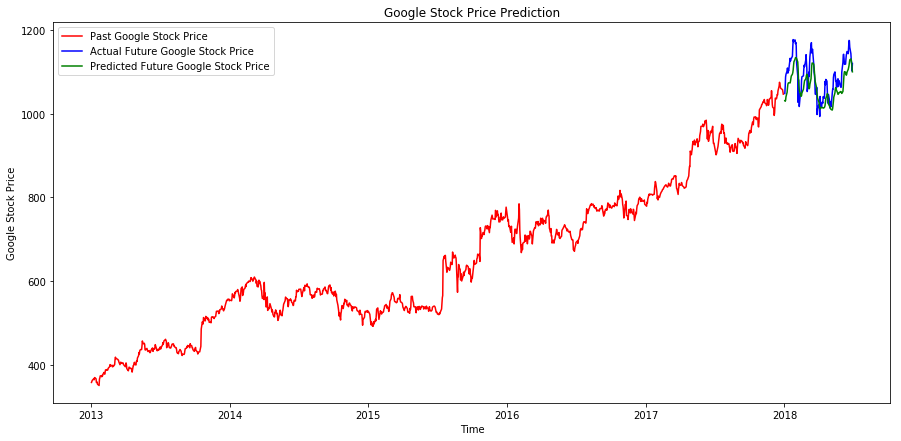

In [25]:
# visualizing the entire process
plt.figure(figsize = (15,7))
plt.plot(dataset_train['Open'], color = 'red', label = 'Past Google Stock Price')
plt.plot(dataset_test['Open'], color = 'blue', label = 'Actual Future Google Stock Price')
plt.plot(pred, color = 'green', label = 'Predicted Future Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

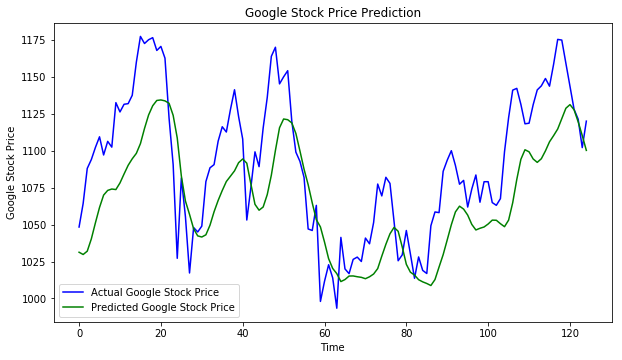

In [26]:
# Visualising the predicted results
plt.figure(figsize = (10,5.5))
plt.plot(real_stock_price, color = 'blue', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()